# Instruction à Laeken

## Sélection des documents pertinents

In [10]:
import os
import yake



In [4]:
ignored = set(["conseil communal", "conseil général"])

kw_extractor = yake.KeywordExtractor(lan="fr", top=20)
data_path = "../tac/data/txt/"
files = os.listdir(data_path)
for f in sorted(files):
    if f.startswith("Lkn"):
        text = open(f'{data_path}/{f}', encoding='utf-8').read()
        keywords = kw_extractor.extract_keywords(text)
        kept = []
        for score, kw in keywords:
            words = kw.split()
            if len(words) > 1 and kw not in ignored:
                kept.append(kw)
        print(f"{f} mentions these keywords: {', '.join(kept)}...")

Lkn_1874_Tome_RptAn_Part_1.txt mentions these keywords: van den kerckhove, l'echevin bockstael, den kerckhove, van den, den kerckhove dit...
Lkn_1874_Tome_RptAn_Part_10.txt mentions these keywords: concession de terrain, terrain pour sépulture, voir conseil communal, sections réunies, voir voies publiques, renvoi aux sections, avis favorable, voir conseil, voir voies...
Lkn_1874_Tome_RptAn_Part_2.txt mentions these keywords: van den kerckhove, l'echevin bockstael, den kerckhove, van den, compte communal...
Lkn_1874_Tome_RptAn_Part_3.txt mentions these keywords: van den kerckhove, l'échevin bockstael, den kerckhove, députation permanente, van den, vanden eynde, bureau de bienfaisance...
Lkn_1874_Tome_RptAn_Part_4.txt mentions these keywords: compte communal, livre de recettes, compte communal porte, députation permanente, recettes porte...
Lkn_1874_Tome_RptAn_Part_5.txt mentions these keywords: van den kerckhove, députation permanente, den kerckhove, l'échevin bockstael, van den, compte

## Pour concaténer les fichiers pertinents 

In [51]:
!mkdir data/instruction
!cp data/txt/Lkn_1879_Tome_I_Part_5.txt data/txt/Lkn_1881_Tome_I_Part_3.txt data/txt/Lkn_1882_Tome_I_Part_4.txt data/txt/Lkn_1883_Tome_RptAn_Part_2.txt data/txt/Lkn_1883_Tome_RptAn_Part_4.txt data/txt/Lkn_1884_Tome_I_Part_4.txt data/txt/Lkn_1884_Tome_I_Part_8.txt data/txt/Lkn_1885_Tome_RptAn_Part_2.txt data/txt/Lkn_1888_Tome_I_Part_6.txt data/txt/Lkn_1888_Tome_I_Part_7.txt data/txt/Lkn_1890_Tome_I_Part_7.txt data/txt/Lkn_1893_Tome_I_Part_1.txt data/txt/Lkn_1899_Tome_RptAn_Part_5.txt data/txt/Lkn_1901_Tome_RptAn_Part_10.txt data/instruction

mkdir: impossible de créer le répertoire «data/instruction»: Le fichier existe


In [52]:
!cat data/instruction/*.txt > data/instruction.txt

In [53]:
!wc ../tac/data/instruction.txt

  67192  357729 1834278 ../tac/data/instruction.txt


## Décrire le corpus


In [31]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [23]:
path = "../tac/data/instruction/"
files = sorted(os.listdir(path))

In [24]:
len(files)

14

In [25]:
chaine = 'Lkn_1879_Tome_I_Part_5.txt'

In [27]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['Lkn', '1879', 'Tome', 'I', 'Part', '5.txt']

In [28]:
# Accéder à l'année
year = chaine_split[1]
year

'1879'

In [42]:
all_years = [str(year) for year in range(1874, 1901)]

In [43]:
dic = defaultdict(int)
dic2 = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f:
        elems = f.split("_")
        city = elems[0]
        year = elems[1]
        tome = elems[3]
        covered_years.add(year)
        decade = year[:3] + "0s"
        dic[decade] += 1
        dic2[city] += 1
        dic2[tome] += 1
    else:
        print(f"Anomalous file: {f}")

In [44]:
print(f"There are {dic2['Bxl']} bulletins from Brussels and {dic2['Lkn']} from Laeken")

There are 0 bulletins from Brussels and 14 from Laeken


In [45]:
nb_rap = dic2['RptAn']
print(f"{len(files)-nb_rap} are real bulletins and {nb_rap} are annual reports")

9 are real bulletins and 5 are annual reports


In [46]:
missing_years = [y for y in all_years if y not in covered_years]
print(f"Missing years: {', '.join(missing_years)}")

Missing years: 1874, 1875, 1876, 1877, 1878, 1880, 1886, 1887, 1889, 1891, 1892, 1894, 1895, 1896, 1897, 1898, 1900


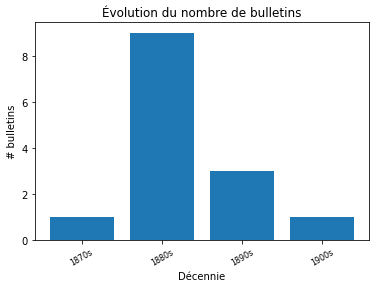

In [47]:
def plot_bar():
    index = np.arange(len(dic))
    plt.bar(index, dic.values())
    plt.xlabel('Décennie')
    plt.ylabel('# bulletins')
    plt.xticks(index, dic.keys(), fontsize=8, rotation=30)
    plt.title('Évolution du nombre de bulletins')
    plt.show()

plot_bar()

## Analyse de la fréquence des mots

In [1]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bootiyahou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords

sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "elles"]
sw = set(sw)

In [17]:
print(f"{len(sw)} stopwords used: {sorted(sw)}")

198 stopwords used: ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'elles', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n'

In [3]:
path = "../tac/data/instruction.txt"
limit = 10**8

with open(path, encoding='utf-8') as f:
    text = f.read()[:limit]

In [4]:
# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

434838 words found


In [5]:
words[:10]

['—', '313', '—', 'Art', '.', '20', '.', 'Les', 'élèves', 'sont']

In [6]:
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

117156 words kept (13503 different word forms)


In [9]:
fdist = nltk.FreqDist(kept)
fdist.most_common(50)

[('rue', 1253),
 ('commune', 989),
 ('conseil', 730),
 ('communal', 615),
 ('école', 564),
 ('laeken', 534),
 ('bourgmestre', 496),
 ('francs', 481),
 ('travaux', 416),
 ('dépenses', 411),
 ('administration', 409),
 ('budget', 383),
 ('écoles', 374),
 ('messieurs', 370),
 ('publique', 353),
 ('rapport', 346),
 ('bureau', 338),
 ('lieu', 336),
 ('police', 321),
 ('recettes', 313),
 ('enfants', 310),
 ('compte', 307),
 ('frais', 300),
 ('bruxelles', 300),
 ('collège', 296),
 ('service', 288),
 ('total', 270),
 ('partie', 266),
 ('situation', 266),
 ('somme', 266),
 ('communale', 259),
 ('part', 251),
 ('population', 251),
 ('exercice', 247),
 ('instruction', 241),
 ('nombre', 239),
 ('année', 237),
 ('taxe', 235),
 ('etat', 229),
 ('vandergeten', 227),
 ('demande', 226),
 ('avenue', 225),
 ('élèves', 220),
 ('moyenne', 217),
 ('art', 215),
 ('chapitre', 213),
 ('section', 203),
 ('entretien', 201),
 ('traitement', 198),
 ('construction', 195)]

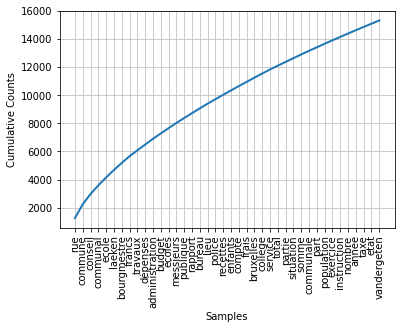

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [10]:
fdist.plot(40, cumulative=True)

In [11]:
# Impression des mots qui n'apparaissent qu'une fois dans le corpus
fdist.hapaxes()[:30]

['tache',
 'attacheront',
 'préviendront',
 'exerçant',
 'réparées',
 'humiliante',
 'rigoureusement',
 'interdite',
 'pédagogie',
 'infligée',
 'accompagnées',
 'infliger',
 'samedis',
 'renseignera',
 'valable',
 'considéreront',
 'noté',
 'négligent',
 'leu',
 'mensuels',
 'attribuées',
 'paraphée',
 'figureront',
 'mathématiques',
 'géographie',
 'commerciales',
 'triplées',
 'secrets',
 'corrigé',
 'marge']

In [12]:
long_words = [w for w in voc if len(w) > 15]
sorted(long_words)[:30]

['adjoinlcommissaire',
 'adminislrativement',
 'allocationcommunaleen',
 'anticipativement',
 'applaudissements',
 'approvisionnements',
 'approximativement',
 'archiducrodolphe',
 'asftfjqtfappastioo',
 'bruxelleshumbeek',
 'cabinetslatrines',
 'cetteproposition',
 'commissaircvoyer',
 'concessionnaires',
 'conlradictoirement',
 'consciencieusement',
 'considerablement',
 'considérablement',
 'consommejournellement',
 'constitutionnelle',
 'contradictoirement',
 'defillesmineures',
 'desfinancesestime',
 'diffevenceenmoins',
 'dutilitépublique',
 'exceptionnellement',
 'extraordinairement',
 'extraordinairsen',
 'franschsprekcnde',
 'franschsprekende']

## Wordcloud

In [12]:
kept_string = " ".join(kept)

In [17]:
with open ('../tac/data/instruction_keyword.txt', 'w') as f:
    f.write(kept_string)

In [18]:
import subprocess

command = [
    'wordcloud_cli',
    '--text', '../tac/data/instruction_keyword.txt',
    '--imagefile', 'data/instruction.png',
    '--width', '2000',
    '--height', '1000',
]

subprocess.run(command, capture_output=True)

CompletedProcess(args=['wordcloud_cli', '--text', '../tac/data/instruction_keyword.txt', '--imagefile', 'data/instruction.png', '--width', '2000', '--height', '1000'], returncode=0, stdout=b'', stderr=b'')

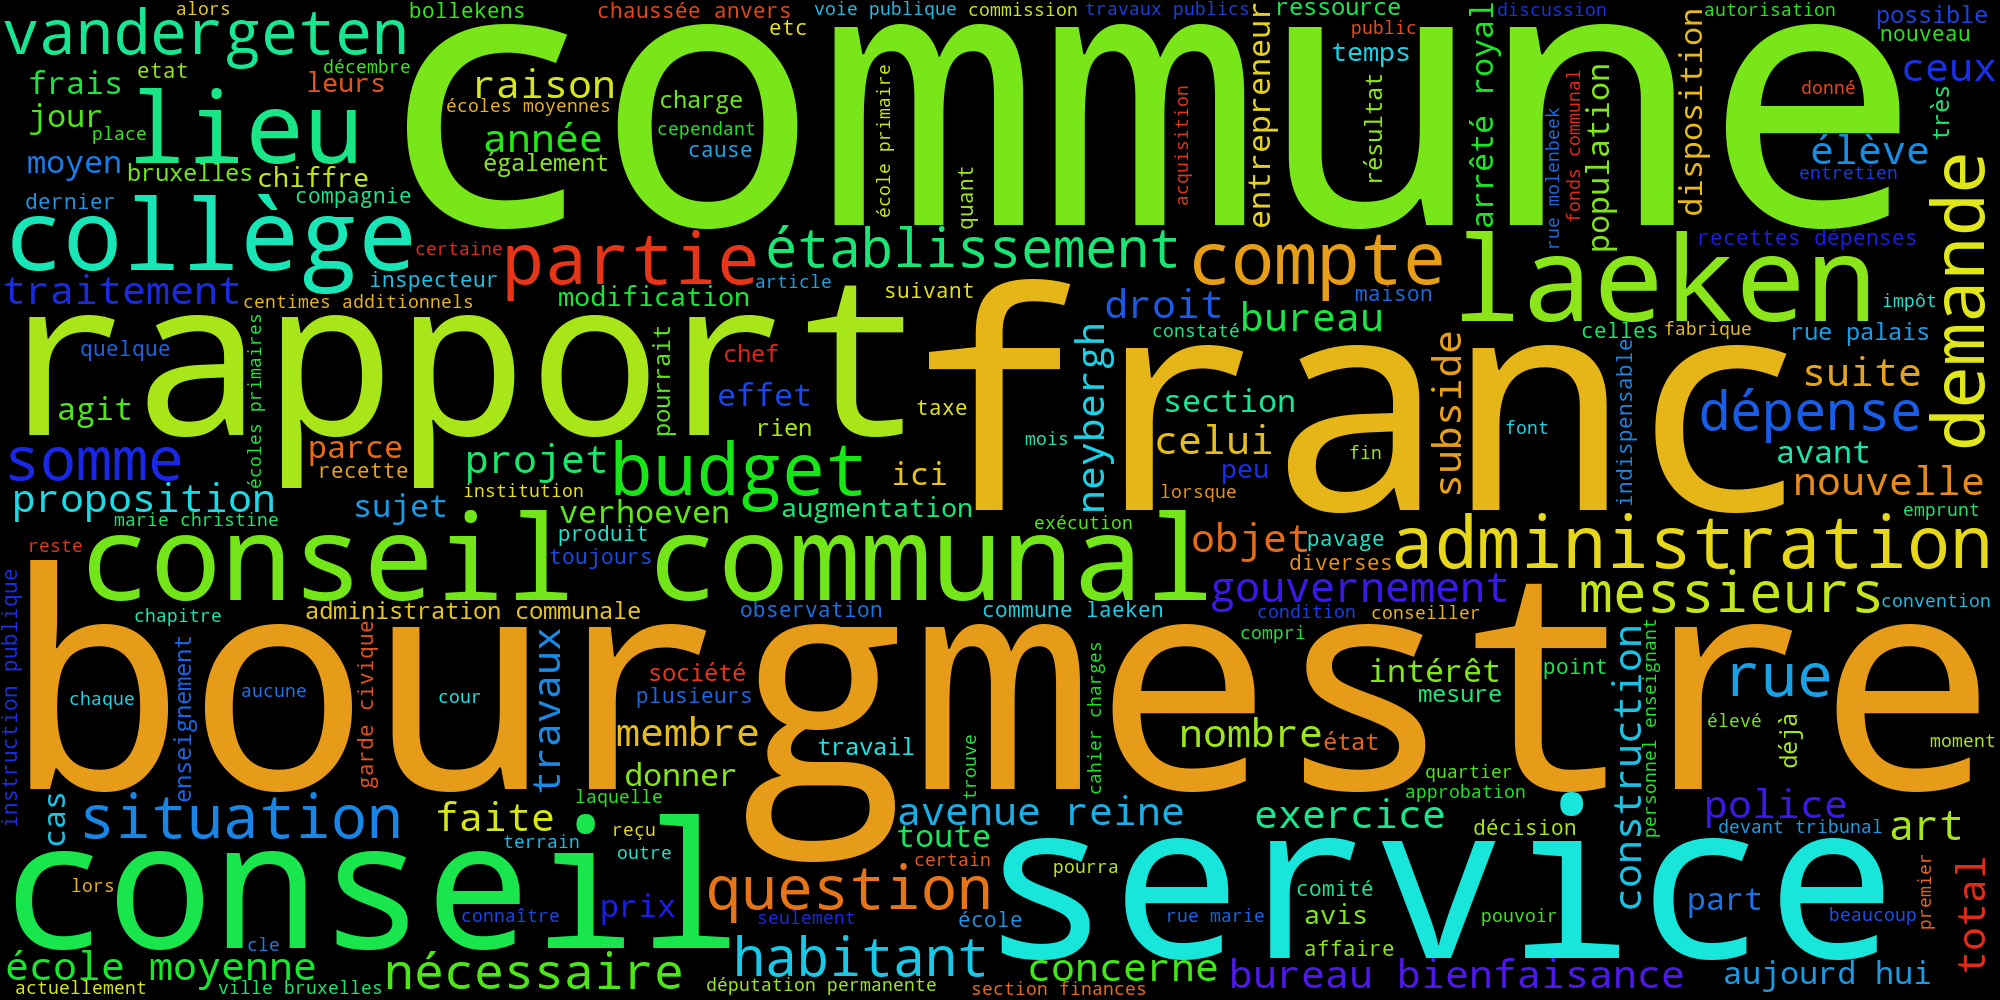

In [21]:
from IPython.display import Image

Image(filename='../tac/data/instruction.png')

In [8]:
from nltk.corpus import stopwords

sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "elles", "conseil", "art", "ici", "plusieurs", "communal", "commune", "service", "bourgmestre", "franc", "rapport","etc", "francs", "somme","compte","demande", "situation", "administration", "lieu", "budget", "construction", "nécessaire", "messieurs", "subside", "partie", "habitant", "projet", "gouvernement", "dépense", "question", "population", "communale", "rue" ]
sw = set(sw)

In [9]:
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]

In [10]:
kept_string = " ".join(kept)
with open ('../tac/data/instruction_keyword.txt', 'w') as f:
    f.write(kept_string)

import subprocess

command = [
    'wordcloud_cli',
    '--text', '../tac/data/instruction_keyword.txt',
    '--imagefile', 'data/instruction.png',
    '--width', '2000',
    '--height', '1000',
]

subprocess.run(command, capture_output=True)

CompletedProcess(args=['wordcloud_cli', '--text', '../tac/data/instruction_keyword.txt', '--imagefile', 'data/instruction.png', '--width', '2000', '--height', '1000'], returncode=0, stdout=b'', stderr=b'')

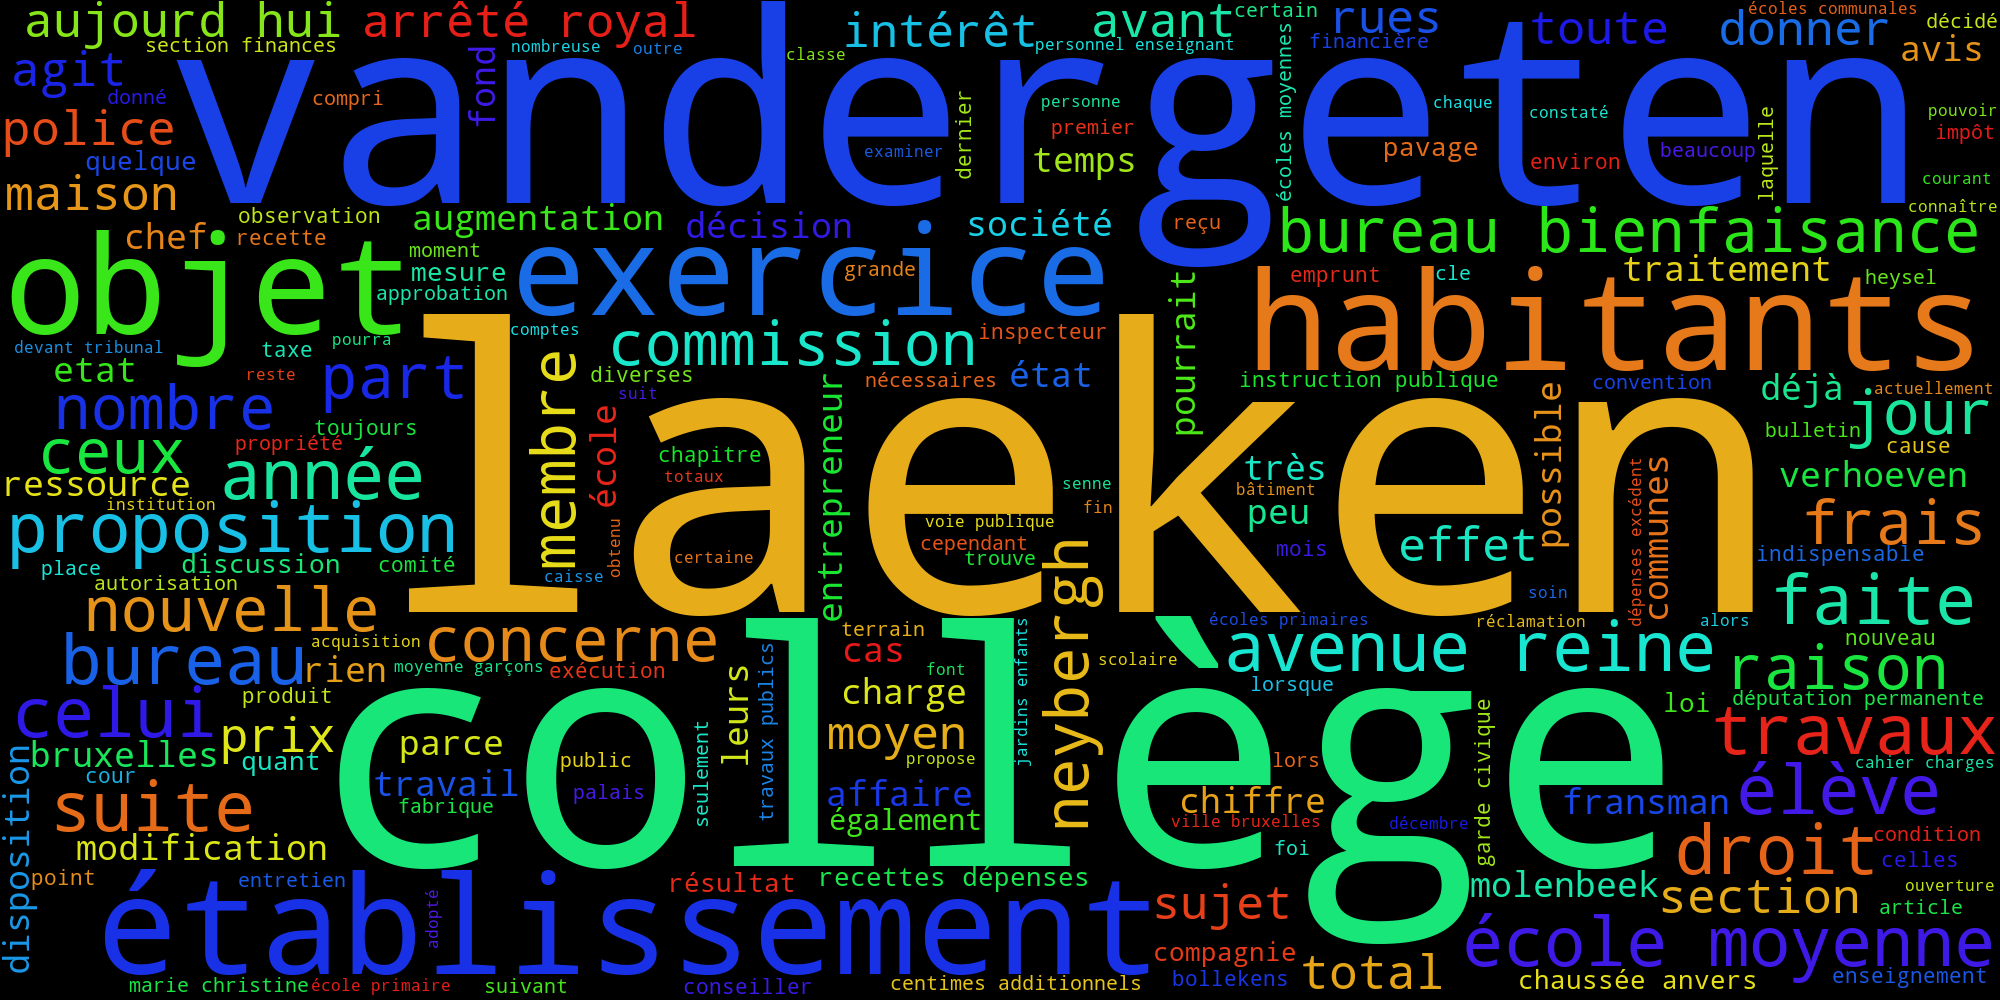

In [11]:
from IPython.display import Image

Image(filename='../tac/data/instruction.png')

## Reconnaissance d'entités nommées

In [1]:
from collections import defaultdict
import sys

import spacy
from spacy.lang.fr.examples import sentences

In [2]:
nlp = spacy.load('fr_core_news_sm')

In [3]:
def search(n=1000000):
    text = open("data/instruction.txt", encoding='utf-8').read()[:n]
    doc = nlp(text)
    people = defaultdict(int)
    for ent in doc.ents:
        if ent.label_ == "PER" and len(ent.text) > 3:
            people[ent.text] += 1
    sorted_people = sorted(people.items(), key=lambda kv: kv[1], reverse=True)
    for person, freq in sorted_people[:50]:
        print(f"{person} appears {freq} times in the corpus")

In [4]:
search (n=1000000)

Messieurs appears 135 times in the corpus
V A N D E appears 21 times in the corpus
Reine appears 21 times in the corpus
Torsin appears 20 times in the corpus
Hospices appears 20 times in the corpus
Adopté appears 18 times in the corpus
Gochet appears 17 times in the corpus
Recettes appears 15 times in the corpus
De Ridder appears 15 times in the corpus
Fransman appears 14 times in the corpus
Léopold appears 12 times in the corpus
— Budget appears 12 times in the corpus
Renvoi appears 12 times in the corpus
M. Torsin appears 10 times in the corpus
Verhoeven appears 10 times in the corpus
Tollenaere appears 10 times in the corpus
Vander Aa appears 10 times in the corpus
Président appears 9 times in the corpus
Monsieur appears 9 times in the corpus
Veuillez agréer appears 9 times in the corpus
Le Président appears 8 times in the corpus
Van Santen appears 8 times in the corpus
M. Fransman appears 8 times in the corpus
A Messieurs les Bourgmestre appears 8 times in the corpus
Jette appears 

## Analyse de sentiments

In [1]:
import sys

from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [2]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    pola, subj = blob.sentiment
    perc = f"{100*abs(pola):.0f}"
    if pola > 0:
        sent = f"{perc}% positive"
    elif pola < 0:
        sent = f"{perc}% negative"
    else:
        sent = "neutral"
    if subj > 0:
        fact = f"{100*subj:.0f}% subjective"
    else:
        fact = "perfectly objective"
    print(f"This text is {sent} and {fact}.")

In [4]:
get_sentiment("M . le Bourgmestre nous demande quelles critiques on peut formuler à l'adresse du Collège. En fait, peut-être aucune. En droit, toujours la même. Le Collège agit et quand le Collège a agi, il vient demander notre approbation.")

This text is 6% positive and 42% subjective.


In [5]:
get_sentiment ("Mais nous ne pouvions pas faire autrement! Que voudriez-vous que nous eussions fait?")

This text is neutral and perfectly objective.


In [6]:
get_sentiment("Je vous demande pardon. Vous auriez pu faire tout autrement.")

This text is 22% positive and 10% subjective.


In [7]:
get_sentiment ("Alors, il faudrait prendre notre place et faire mieux.")

This text is neutral and perfectly objective.


In [8]:
get_sentiment ("Je ne demande pas à la prendre.")

This text is neutral and perfectly objective.


In [9]:
get_sentiment ("Je ne comprends vraiment pas ce que veut M . Vandergeten. Nous faisons de l'administration comme nous devons la faire, comme la loi nous l'indique, et je ne vois pas le reproche qu'on peut nous adresser.")

This text is neutral and 50% subjective.


In [10]:
get_sentiment ("Ce n'est pas exact.")

This text is 12% negative and 20% subjective.


In [11]:
get_sentiment("Lisez la loi.")

This text is neutral and perfectly objective.


## Clustering

In [25]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/bootiyahou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
data_path = "../tac/data/instruction/"

In [28]:
N_CLUSTERS = 7

In [29]:
files = [f for f in sorted(os.listdir(data_path)) ]

In [30]:
texts = [open(data_path + f).read() for f in files]

In [31]:
def process_text(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

In [32]:
vectorizer = TfidfVectorizer(tokenizer=process_text,
                                stop_words=stopwords.words('french'),
                                max_df=0.5,
                                min_df=0.1,
                                lowercase=True)

In [33]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 2.62 s, sys: 5.22 ms, total: 2.62 s
Wall time: 2.62 s


In [34]:
km_model = KMeans(n_clusters=N_CLUSTERS)

In [35]:
km_model.fit(tfidf_vectors)

KMeans(n_clusters=7)

In [36]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(km_model.labels_):
    clustering[label].append(files[idx])

In [37]:
pprint(dict(clustering))

{0: ['Lkn_1882_Tome_I_Part_4.txt',
     'Lkn_1883_Tome_RptAn_Part_2.txt',
     'Lkn_1885_Tome_RptAn_Part_2.txt'],
 1: ['Lkn_1884_Tome_I_Part_8.txt', 'Lkn_1890_Tome_I_Part_7.txt'],
 2: ['Lkn_1888_Tome_I_Part_6.txt',
     'Lkn_1888_Tome_I_Part_7.txt',
     'Lkn_1893_Tome_I_Part_1.txt'],
 3: ['Lkn_1901_Tome_RptAn_Part_10.txt'],
 4: ['Lkn_1879_Tome_I_Part_5.txt', 'Lkn_1881_Tome_I_Part_3.txt'],
 5: ['Lkn_1883_Tome_RptAn_Part_4.txt', 'Lkn_1884_Tome_I_Part_4.txt'],
 6: ['Lkn_1899_Tome_RptAn_Part_5.txt']}


## Sentence Tokenizer

In [28]:
import os
import sys
import nltk
from nltk.tokenize import sent_tokenize

In [34]:
infile = "../tac/data/instruction.txt"
outfile = "../tac/data/sents_instruction.txt"

In [35]:
LIMIT = None

In [38]:
with open(outfile, 'w', encoding="utf-8") as output:
    with open(infile, encoding="utf-8", errors="backslashreplace") as f:
        content = f.readlines()
        content = content[:LIMIT] if LIMIT is not None else content
        n_lines = len(content)
        for i, line in enumerate(content):
            if i % 10000 == 0:
                print(f'processing line {i}/{n_lines}')
            sentences = sent_tokenize(line)
            for sent in sentences:
                output.write(sent + "\n")

processing line 0/67193
processing line 10000/67193
processing line 20000/67193
processing line 30000/67193
processing line 40000/67193
processing line 50000/67193
processing line 60000/67193


## Construire un modèle

In [39]:
import sys

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import wordpunct_tokenize
from unidecode import unidecode

In [40]:
class MySentences(object):
    """Tokenize and Lemmatize sentences"""
    def __init__(self, filename):
        self.filename = filename

    def __iter__(self):
        for line in open(self.filename, encoding='utf-8', errors="backslashreplace"):
            yield [unidecode(w.lower()) for w in wordpunct_tokenize(line)]

In [41]:
infile = f"../tac/data/sents_instruction.txt"
sentences = MySentences(infile)

In [42]:
bigram_phrases = Phrases(sentences)

In [43]:
type(bigram_phrases.vocab)

collections.defaultdict

In [44]:
len(bigram_phrases.vocab.keys())

93584

In [45]:
bigram_phraser = Phraser(phrases_model=bigram_phrases)

In [46]:
trigram_phrases = Phrases(bigram_phraser[sentences])

In [47]:
trigram_phraser = Phraser(phrases_model=trigram_phrases)

In [48]:
corpus = list(trigram_phraser[bigram_phraser[sentences]])

In [49]:
%%time
model = Word2Vec(
    corpus, # On passe le corpus de ngrams que nous venons de créer
    size=32, # Le nombre de dimensions dans lesquelles le contexte des mots devra être réduit, aka. vector_size
    window=5, # La taille du "contexte", ici 5 mots avant et après le mot observé
    min_count=5, # On ignore les mots qui n'apparaissent pas au moins 5 fois dans le corpus
    workers=4, # Permet de paralléliser l'entraînement du modèle en 4 threads
    iter=5 # Nombre d'itérations du réseau de neurones sur le jeu de données pour ajuster les paramètres avec la descende de gradient, aka. epochs.
)

CPU times: user 3.19 s, sys: 24 ms, total: 3.21 s
Wall time: 2.11 s


In [50]:
outfile = f"../tac/data/instruction.model"
model.save(outfile)

## Explorer le modèle

In [39]:
from gensim.models import Word2Vec
from pprint import pprint

In [60]:
model = Word2Vec.load("../tac/data/bulletins.model")

In [74]:
model.wv.most_similar("école", topn=20)

[('école_primaire', 0.887546718120575),
 ('ecole', 0.8620980978012085),
 ('école_primaire_supérieure', 0.8495850563049316),
 ('école_moyenne', 0.8303161263465881),
 ('athénée', 0.803378701210022),
 ('éducation', 0.8000466823577881),
 ('université', 0.7977675795555115),
 ('académie', 0.7892481088638306),
 ('école_gardienne', 0.7817554473876953),
 ('exposition', 0.7805495262145996),
 ('école_ménagère', 0.7795713543891907),
 ('orientation', 0.7781248092651367),
 ('ecole_industrielle', 0.7773594856262207),
 ('exposition_internationale', 0.774172306060791),
 ('organisation', 0.7716985940933228),
 ('école_normale', 0.771643877029419),
 ('habitation', 0.7669842839241028),
 ('association', 0.7634074687957764),
 ('ecole_primaire', 0.7625539302825928),
 ('intégration', 0.7524409294128418)]

In [76]:
model.wv.most_similar("élève", topn=20)

[('élevait', 0.8782487511634827),
 ('élèverait', 0.8314709067344666),
 ('élèvera', 0.8255230784416199),
 ('élèvent', 0.8189101815223694),
 ('élevant', 0.8137197494506836),
 ('élevaient', 0.7771095037460327),
 ('élèveront', 0.7370169758796692),
 ('élèveraient', 0.7212008237838745),
 ('élevanl', 0.6982050538063049),
 ('se_monte', 0.6957286596298218),
 ('élèvent_respectivement', 0.6848183870315552),
 ('on_arriverait', 0.6781779527664185),
 ('nous_arriverions', 0.6639816761016846),
 ('élevant_respectivement', 0.6630305051803589),
 ('accroît', 0.6610273122787476),
 ('allocation_prévue', 0.653454065322876),
 ('allocation_inscrite', 0.6416244506835938),
 ('se_sont_élevées', 0.6375724077224731),
 ('correspond', 0.6343804597854614),
 ('se_montent', 0.629923403263092)]

In [77]:
model.wv.most_similar("instruction", topn=20)

[('organisation', 0.8814812302589417),
 ('enseignement_professionnel', 0.8770321607589722),
 ('enseignement_technique', 0.8706238269805908),
 ('académie', 0.854932427406311),
 ('enseignement', 0.852418839931488),
 ('hygiène_publique', 0.8391090631484985),
 ('inspection', 0.8369802236557007),
 ('hygiène', 0.8343179225921631),
 ('accomplissement', 0.8233000040054321),
 ('enseignement_officiel', 0.8095273375511169),
 ('armée', 0.8094764947891235),
 ('université', 0.8081808090209961),
 ('organisation_actuelle', 0.8067765831947327),
 ('enseignement_supérieur', 0.806430995464325),
 ('étude', 0.8043315410614014),
 ('existence', 0.7959370613098145),
 ('enfance', 0.7934615612030029),
 ('activité', 0.7931686639785767),
 ('enseignement_libre', 0.792747974395752),
 ('orientation', 0.7911001443862915)]

In [78]:
model.wv.most_similar("enseignement", topn=20)

[('enseignement_primaire', 0.8744345307350159),
 ('enseignement_professionnel', 0.8702150583267212),
 ('enseignement_supérieur', 0.8681878447532654),
 ('organisation', 0.8578138947486877),
 ('instruction', 0.852418839931488),
 ('enseignement_secondaire', 0.8394330739974976),
 ('intérêt_général', 0.8350447416305542),
 ('enseignement_moyen', 0.8331505060195923),
 ('enseignement_technique', 0.8330767154693604),
 ('enseignement_officiel', 0.8314554691314697),
 ('activité', 0.8200572729110718),
 ('ignorance', 0.8186326622962952),
 ('intégration', 0.8137826919555664),
 ('hygiène', 0.8121615648269653),
 ('existence', 0.8060768246650696),
 ('enseignement_spécial', 0.8029785752296448),
 ('histoire', 0.7977237105369568),
 ('enfance', 0.7957729697227478),
 ('efficacité', 0.7934404611587524),
 ('enseignement_normal', 0.7925955057144165)]

In [79]:
model.wv.most_similar("exercice", topn=20)

[('exercice_courant', 0.7893228530883789),
 ('exercice_précédent', 0.777747631072998),
 ('année', 0.7762175798416138),
 ('année_scolaire', 0.768883466720581),
 ('arriéré', 0.7644239664077759),
 ('excédent', 0.7528244256973267),
 ('index', 0.7403033375740051),
 ('instruction_primaire', 0.7370467185974121),
 ('année_écoulée', 0.7358577847480774),
 ('exercice_écoulé', 0.7320533990859985),
 ('extraordinaire', 0.7265564203262329),
 ('année_antérieure', 0.7247570753097534),
 ('accroissement', 0.7236884832382202),
 ('indicateur_général', 0.7228705883026123),
 ('emprunt', 0.7163915634155273),
 ('année_précédente', 0.702843427658081),
 ('enseignement_primaire', 0.7026225328445435),
 ('année_courante', 0.6940716505050659),
 ('année_académique', 0.6936964988708496),
 ('ensemble', 0.6928114891052246)]

In [81]:
model.wv.most_similar("section", topn=10)

[('seclion', 0.8658934831619263),
 ('commission', 0.8223574161529541),
 ('commission_consultative', 0.7574484348297119),
 ('commission_spéciale', 0.741607666015625),
 ('lecture', 0.7331665754318237),
 ('seelion', 0.7191166877746582),
 ('chambre', 0.7165282964706421),
 ('direction', 0.7042341828346252),
 ('brochure_traitant', 0.702558159828186),
 ('seciion', 0.6973785161972046)]

In [82]:
model.wv.most_similar("bureau", topn=10)

[('parquet', 0.7979073524475098),
 ('bureau_central', 0.7859442830085754),
 ('comité_central', 0.7548466920852661),
 ('dispensaire', 0.7537069320678711),
 ('service', 0.7465667128562927),
 ('cabinet', 0.744766116142273),
 ('commandant', 0.7440356016159058),
 ('licenciement', 0.7431609630584717),
 ('conseil_académique', 0.7415145635604858),
 ('comité', 0.7380654215812683)]

In [68]:
model.wv.most_similar("etablissement", topn=10)

[('enduit', 0.8535730242729187),
 ('écurie', 0.8482165336608887),
 ('installation', 0.8186216354370117),
 ('exhaussement', 0.8160120248794556),
 ('extraction', 0.8156746029853821),
 ('erection', 0.7990763187408447),
 ('asphaltage', 0.793846607208252),
 ('embranchement', 0.7905414700508118),
 ('appropriation', 0.7890174388885498),
 ('auvent', 0.7785249352455139)]

In [83]:
model.wv.most_similar("bulletin", topn=20)

[('document', 0.859302818775177),
 ('tableau', 0.8521320819854736),
 ('journal', 0.8494600057601929),
 ('rapport_annuel', 0.8400279879570007),
 ('questionnaire', 0.837827205657959),
 ('texte', 0.8242934942245483),
 ('recueil', 0.8181442022323608),
 ('rapport', 0.8114561438560486),
 ('dossier', 0.8104521036148071),
 ('registre', 0.8044392466545105),
 ('second_paragraphe', 0.7980363368988037),
 ('répertoire', 0.7878460884094238),
 ('programme', 0.7776236534118652),
 ('jury', 0.7714173793792725),
 ('souhait', 0.7687804102897644),
 ('bureau_permanent', 0.7678703665733337),
 ('discours', 0.7656212449073792),
 ('préambule', 0.7602584362030029),
 ('congrès_international', 0.756676435470581),
 ('conseil_académique', 0.7551405429840088)]

In [84]:
model.wv.most_similar("personnel_enseignant", topn=20)

[('corps_enseignant', 0.9481070041656494),
 ('personnel', 0.93760085105896),
 ('corps_professoral', 0.8879657983779907),
 ('recrutement', 0.8711244463920593),
 ('service_social', 0.8445876240730286),
 ('personnel_ouvrier', 0.842899739742279),
 ('personnel_administratif', 0.8160101175308228),
 ('jury', 0.8118877410888672),
 ('corps_médical', 0.810820996761322),
 ('sort', 0.802167534828186),
 ('contrôle', 0.7955607175827026),
 ('personnel_infirmier', 0.7890839576721191),
 ('choléra', 0.7862066030502319),
 ('premier_degré', 0.7830348610877991),
 ('comité', 0.778131902217865),
 ('comité_central', 0.7767818570137024),
 ('personnel_médical', 0.7765641808509827),
 ('parti_ouvrier', 0.773071825504303),
 ('contingent', 0.7707594633102417),
 ('parquet', 0.7669166326522827)]

In [71]:
model.wv.most_similar("vandergeten", topn=10)

[('neybergh', 0.9710527658462524),
 ('bollekens', 0.9357353448867798),
 ('delannoy', 0.9206187725067139),
 ('janson', 0.91908198595047),
 ('martiny', 0.9141010046005249),
 ('gellens', 0.910036027431488),
 ('brandenburg', 0.9061568379402161),
 ('kops', 0.8978050351142883),
 ('furnemont', 0.8976720571517944),
 ('camille_huysmans', 0.8959799408912659)]

In [72]:
model.wv.most_similar("schryver", topn=10)

[('polter', 0.9003366231918335),
 ('cordemans', 0.8958569765090942),
 ('jaer', 0.8955181241035461),
 ('ceuster', 0.8905877470970154),
 ('janssen', 0.8904988765716553),
 ('potier', 0.8890150189399719),
 ('tollenaere', 0.8876402378082275),
 ('haulleville', 0.8844889998435974),
 ('bremaecker', 0.8761205673217773),
 ('mommaerts', 0.8748773336410522)]